# Statsmodels

The first package we will work with in python will be `statsmodels`, which provides an interesting implementation of linear regression

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from ipywidgets import interact
%matplotlib inline

In [2]:
from jupyterthemes import jtplot
jtplot.style()

In [3]:
data = pd.read_csv("Advertising.csv")

In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


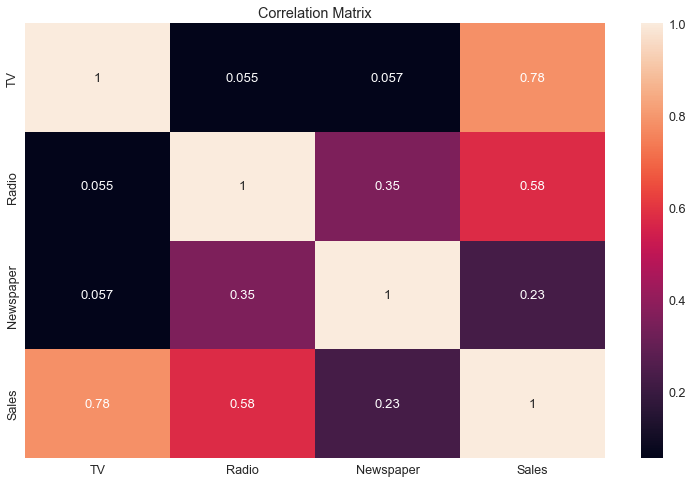

In [8]:
fig, ax = plt.subplots(figsize = (13, 8))

ax = sns.heatmap(data.corr(), annot = True)
ax.set_title('Correlation Matrix');

## 1-D Linear Regression

Let's start with a simple regression, we can see that sales and TV have a high correlation so it seems a good idea to use them for the model

In [9]:
model = smf.ols(formula = 'Sales~TV', data = data).fit()

In [10]:
model

In [11]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

$$Sales = 0.04537 TV + 7.032594$$

In [12]:
model.rsquared

0.611875050850071

In [13]:
model.predict(data['TV'])

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

In [14]:
model.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [15]:
1e-2

0.01

In [16]:
def hip_t_p_value(p_value):
    
    fig, ax = plt.subplots(figsize = (13, 8))
    
    dist = stats.norm()
    x    = np.linspace(-4, 4, 1000)
    
    ax.plot(x, dist.pdf(x), color = 'r')
    ax.axvline(dist.ppf(p_value / 2), color = 'g', alpha = 0.7)
    ax.axvline(dist.ppf(1 - (p_value / 2)), color = 'g', alpha = 0.7)
    ax.fill_between(x, dist.pdf(x), where = x <= dist.ppf(p_value / 2), color = 'g', alpha = 0.5)
    ax.fill_between(x, dist.pdf(x), where = x >= dist.ppf(1 - (p_value / 2)), color = 'g', alpha = 0.5)
    
    ax.set_title('View p-value', fontsize = 15)

In [17]:
interact(hip_t_p_value, p_value = (0.01, 0.61, 0.05));

interactive(children=(FloatSlider(value=0.26, description='p_value', max=0.61, min=0.01, step=0.05), Output())…

Multiple linear regression has several parameters $w_i$ and naturally each of this has its own p-value, but here we have a new important hypotesis testing, the **F-test**.

$$
\left\{
\begin{matrix}
H_0: & w_1 = \cdots = w_d = 0\\
H_1: & \text{At least one } w_i\ne 0\\
\end{matrix}
\right.
$$

How to compute $F$?

$$ F(D - 1, N - k) = \frac{\frac{SSR}{D - 1}}{\frac{SSE}{N - D}}$$

$$SSE = \sum (y_i - \hat{y}_i)^2$$

$$SSR = \sum (\hat{y}_i - \bar{y})^2$$

In [18]:
def hip_f_p_value(p_value, N, k):
    
    fig, ax = plt.subplots(figsize = (13, 8))
    
    dist = stats.f(k - 1, N - k)
    x    = np.linspace(0, 4, 1000)
    
    ax.plot(x, dist.pdf(x), color = 'r')
    ax.axvline(dist.ppf(1 - (p_value / 2)), color = 'g', alpha = 0.7)
    ax.fill_between(x, dist.pdf(x), where = x >= dist.ppf(1 - (p_value / 2)), color = 'g', alpha = 0.5)
    
    ax.set_title('View p-value', fontsize = 15)

In [19]:
interact(hip_f_p_value, p_value = (0.01, 0.4, 0.01), N = (40, 100, 1), k = (4, 15, 1));

interactive(children=(FloatSlider(value=0.2, description='p_value', max=0.4, min=0.01, step=0.01), IntSlider(v…

In [20]:
model.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           1.47e-42
Time:                        18:53:00   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now that we have our model, we are going to talk about an assumption of linear regression, and that is that the errors follow a normal distribution.

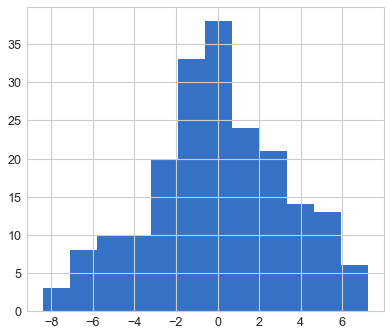

In [22]:
plt.hist(data['Sales'] - model.predict(data['TV']), bins = 'fd');

Now we have multiples models to test

* Sales ~TV
* Sales ~Newspaper
* Sales ~Radio
* Sales ~TV+Newspaper
* Sales ~TV+Radio
* Sales ~Newspaper+Radio
* Sales ~TV+Newspaper+Radio

In [23]:
#Add the Newspaper
model2 = smf.ols(formula="Sales~TV+Newspaper", data = data).fit()

In [24]:
model2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [25]:
model2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

In [26]:
5e-2

0.05

In [27]:
model.rsquared, model2.rsquared

(0.611875050850071, 0.6458354938293271)

In [28]:
model.rsquared_adj, model2.rsquared_adj

(0.6099148238341623, 0.6422399150864777)

In [29]:
model2.predict(data[["TV", "Newspaper"]])

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

In [30]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           3.95e-45
Time:                        18:53:06   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

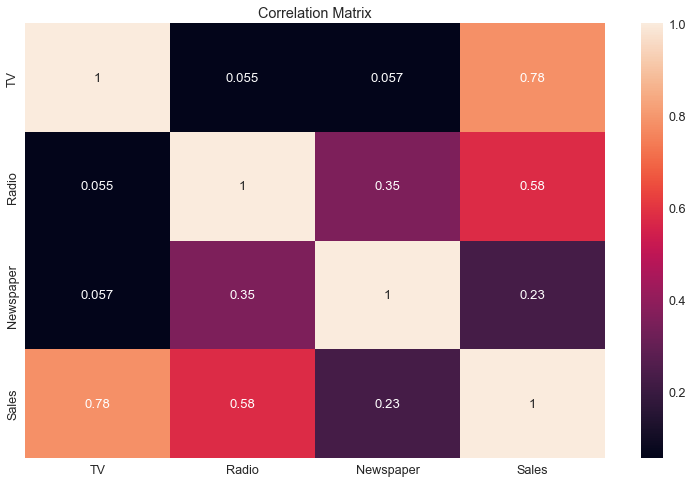

In [31]:
fig, ax = plt.subplots(figsize = (13, 8))

ax = sns.heatmap(data.corr(), annot = True)
ax.set_title('Correlation Matrix');

In [32]:
#Add the Radio
model3 = smf.ols(formula="Sales~TV+Radio", data = data).fit()

In [33]:
model3.params

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64

In [34]:
model3.pvalues

Intercept    4.565557e-19
TV           5.436980e-82
Radio        9.776972e-59
dtype: float64

In [35]:
model.rsquared, model2.rsquared, model3.rsquared

(0.611875050850071, 0.6458354938293271, 0.8971942610828957)

In [36]:
model.rsquared_adj, model2.rsquared_adj, model3.rsquared_adj

(0.6099148238341623, 0.6422399150864777, 0.8961505479974429)

In [37]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           4.83e-98
Time:                        18:53:09   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
#Full House
model4 = smf.ols(formula="Sales~TV+Radio+Newspaper", data = data).fit()

In [39]:
model4.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [40]:
model4.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64

In [41]:
model.rsquared, model2.rsquared, model3.rsquared, model4.rsquared

(0.611875050850071, 0.6458354938293271, 0.8971942610828957, 0.8972106381789522)

In [42]:
model.rsquared_adj, model2.rsquared_adj, model3.rsquared_adj, model4.rsquared_adj

(0.6099148238341623,
 0.6422399150864777,
 0.8961505479974429,
 0.8956373316204668)

In [43]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           1.58e-96
Time:                        18:53:11   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multicollinearity

Multicollinearity (or collinearity) occurs when one independent variable in a regression model is linearly correlated with another independent variable.

An example of this is if we used `Age` and `Number of Rings` in a regression model for predicting the weight of a tree.

Because there is a high correlation between the age of a tree and the number of rings that a tree has (generally, one ring per year), multicollinearity would be present in this model.


#### What Causes Multicollinearity?

And for sure you could ask yourself, and how does this affect my model?, well we had seen that we can obtain the parameters of the linear regression as:

$$w = (X^T X)^{-1} X^T y$$

Notice that we assume in that $(X^T X)$ is invertible, if the columns of $X$ are linearly dependent of each other (i.e. if multicollinearity is present), $(X^T X)$ is not invertible, and this is a problem.


#### Problems That Arise From Multicollinearity

It will be hard to detect statistical significance. Furthermore, it’s possible that the $F$ statistic is significant but the individual $t$ statistics are not. Ultimately, multicollinearity makes prediction less accurate.


#### How to Detect and Eliminate Multicollinearity


A simple method to detect multicollinearity in a model is by using something called the variance inflation factor or the $VIF$ for each predicting variable.

$$x_1 = \beta_2 x_2 + \beta_3 x_3 + \cdots + \beta_n x_n + \beta_0 + \epsilon$$

$$VIF = \frac{1}{1 - R^2}$$ 

A $VIF$ of 1 (the minimum possible VIF) means the tested predictor is not correlated with the other predictors.

An acceptable VIF is if it’s less than the max of 10 and $\frac{1}{1 - R^2}$ model:

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
X = data.drop('Sales', axis = 1).values

In [46]:
variance_inflation_factor(X, 1)

3.285462100162896

In [47]:
def vif(X):
    
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    
    return vif_data

In [48]:
X = data[['TV', 'Radio', 'Newspaper']]

In [49]:
vif(X)

,Feature,VIF
0,TV,2.486772
1,Radio,3.285462
2,Newspaper,3.055245


In [50]:
1 / (1 - model4.rsquared_adj)

9.581970406921025

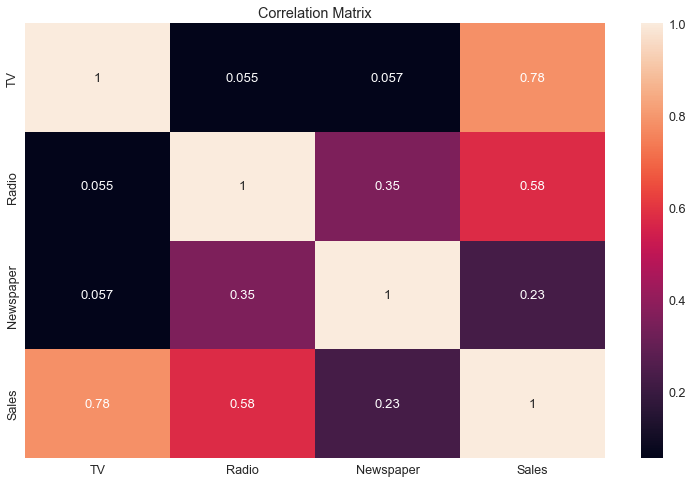

In [51]:
fig, ax = plt.subplots(figsize = (13, 8))

ax = sns.heatmap(data.corr(), annot = True)
ax.set_title('Correlation Matrix');

In [52]:
model3.rsquared_adj, model4.rsquared_adj

(0.8961505479974429, 0.8956373316204668)

To give an wrose example, I'm going to use [Kaggle’s California Housing Prices dataset](https://www.kaggle.com/camnugent/california-housing-prices).

In [53]:
data2 = pd.read_csv('housing.csv', usecols = ['total_rooms','total_bedrooms','median_income'])

In [54]:
data2.head()

,total_rooms,total_bedrooms,median_income
0,880.0,129.0,8.3252
1,7099.0,1106.0,8.3014
2,1467.0,190.0,7.2574
3,1274.0,235.0,5.6431
4,1627.0,280.0,3.8462


In [55]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_rooms     20640 non-null  float64
 1   total_bedrooms  20433 non-null  float64
 2   median_income   20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


In [56]:
data2.describe()

,total_rooms,total_bedrooms,median_income
count,20640.000000,20433.000000,20640.000000
mean,2635.763081,537.870553,3.870671
std,2181.615252,421.385070,1.899822
min,2.000000,1.000000,0.499900
25%,1447.750000,296.000000,2.563400
50%,2127.000000,435.000000,3.534800
75%,3148.000000,647.000000,4.743250
max,39320.000000,6445.000000,15.000100


In [57]:
data2.dropna(inplace = True, how = 'any')

In [58]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_rooms     20433 non-null  float64
 1   total_bedrooms  20433 non-null  float64
 2   median_income   20433 non-null  float64
dtypes: float64(3)
memory usage: 638.5 KB


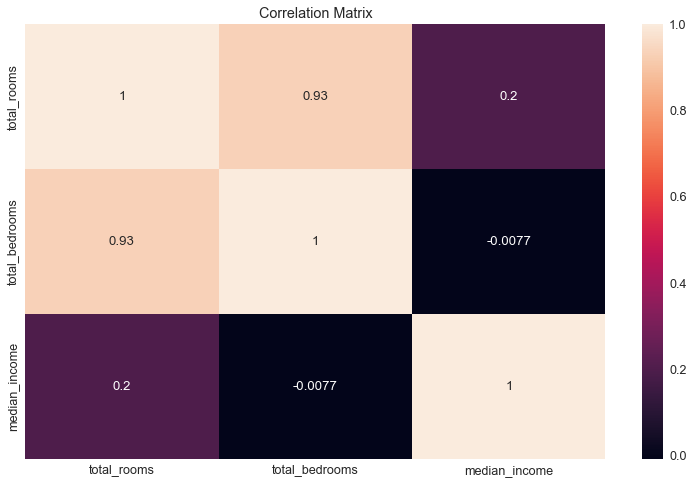

In [59]:
fig, ax = plt.subplots(figsize = (13, 8))

ax = sns.heatmap(data2.corr(), annot = True)
ax.set_title('Correlation Matrix');

In [60]:
vif(data2)

,Feature,VIF
0,total_rooms,21.185403
1,total_bedrooms,18.607639
2,median_income,2.305062


## Outliers

In [61]:
x = data2['total_rooms'].values

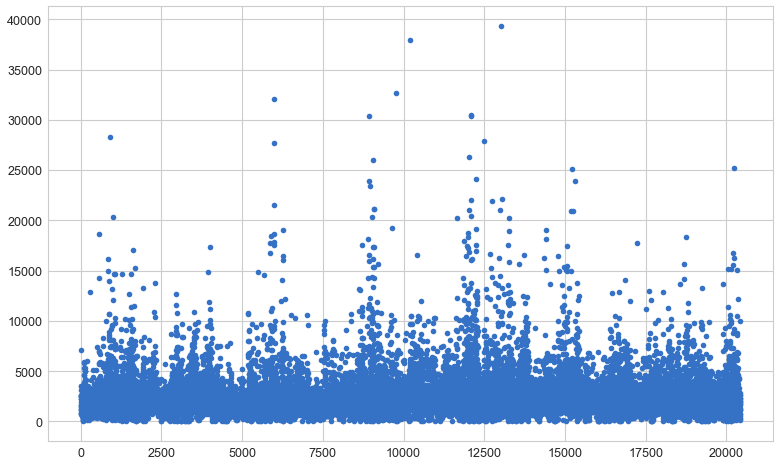

In [62]:
fig, ax = plt.subplots(figsize = (13, 8))
ax.plot(x, linestyle = '', color = 'b', marker = 'o');

### Z - score

In [63]:
xz = (x - x.mean()) / x.std()

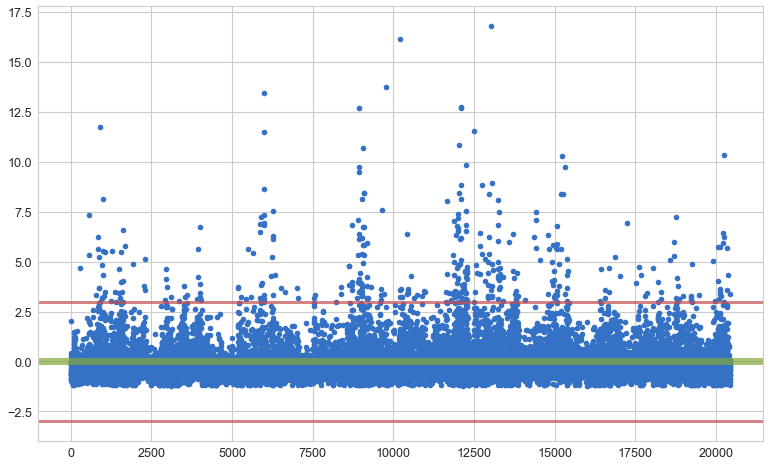

In [64]:
fig, ax = plt.subplots(figsize = (13, 8))
ax.plot(xz, linestyle = '', color = 'b', marker = 'o')
ax.axhline(xz.mean(), color = 'g', alpha = 0.7, linewidth = 7)
ax.axhline(xz.mean() + 3 * xz.std(), color = 'r', alpha = 0.7, linewidth = 3)
ax.axhline(xz.mean() - 3 * xz.std(), color = 'r', alpha = 0.7, linewidth = 3);

$$z = \frac{x - \mu}{\sigma}$$

1 255
2 255
3 139
4 65
5 33
6 13
7 8
8 3
9 3
10 1
11 0


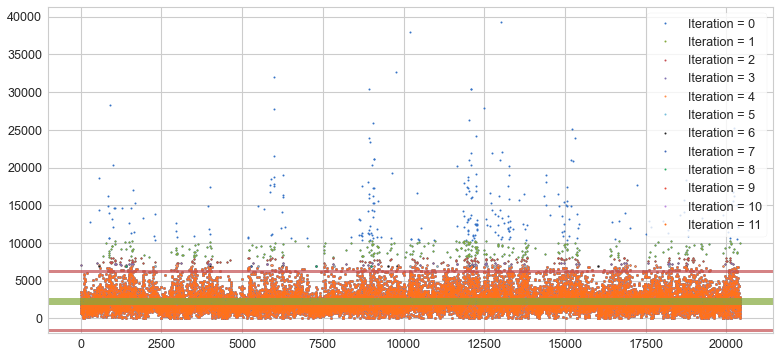

In [65]:
flag      = True
threshold = 3.5
i = 0

fig, ax = plt.subplots(figsize = (13, 6))
x_copy = x.copy()
while flag:
    
    ax.plot(x_copy, linestyle = '', marker = 'o', markersize = 2, label = f'Iteration = {i}')
    i += 1
    z = (x_copy - np.nanmean(x_copy)) / np.nanstd(x_copy)

    mask = (z > threshold) | (z < (-threshold))
    print(i, sum(mask))
    x_copy[mask] = np.nan
    
    if mask.sum() == 0:
        ax.plot(x_copy, linestyle = '', marker = 'o', markersize = 2, label = f'Iteration = {i}')
        break
        
        
ax.axhline(np.nanmean(x_copy), color = 'g', alpha = 0.7, linewidth = 7)
ax.axhline(np.nanmean(x_copy) + 3 * np.nanstd(x_copy), color = 'r', alpha = 0.7, linewidth = 3)
ax.axhline(np.nanmean(x_copy) - 3 * np.nanstd(x_copy), color = 'r', alpha = 0.7, linewidth = 3)
ax.legend();

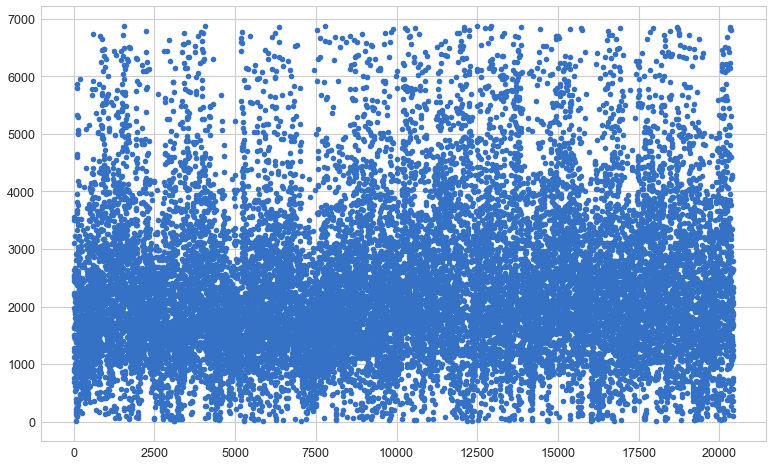

In [66]:
fig, ax = plt.subplots(figsize = (13, 8))
ax.plot(x_copy, linestyle = '', color = 'b', marker = 'o');

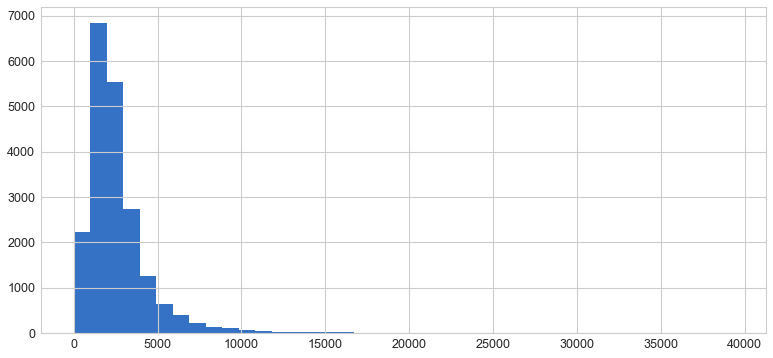

In [67]:
fig, ax = plt.subplots(figsize = (13, 6))
ax.hist(x, bins = 40);

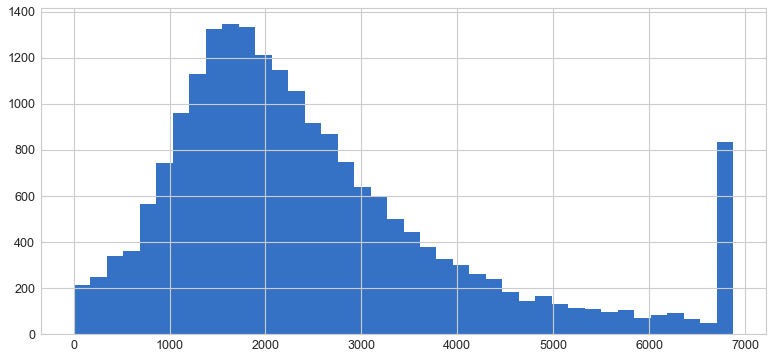

In [68]:
mask = np.isnan(x_copy)
x_copy[mask] = np.nanmax(x_copy)
fig, ax = plt.subplots(figsize = (13, 6))
ax.hist(x_copy, bins = 40);

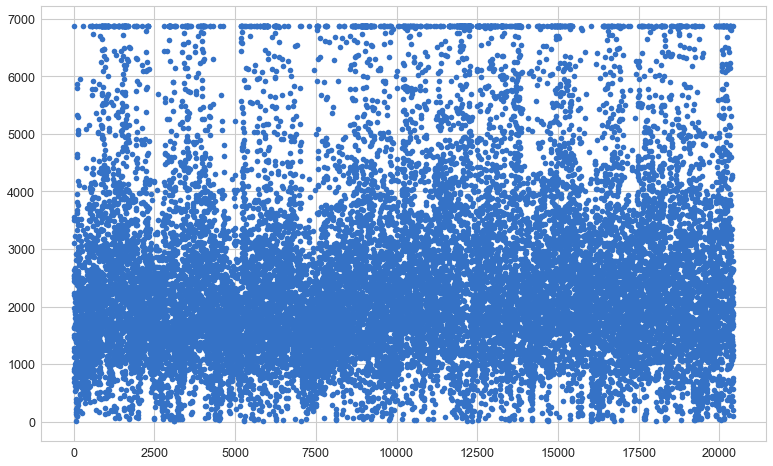

In [69]:
fig, ax = plt.subplots(figsize = (13, 8))
ax.plot(x_copy, linestyle = '', color = 'b', marker = 'o');

In [70]:
x = data2[['total_rooms', 'median_income']].values

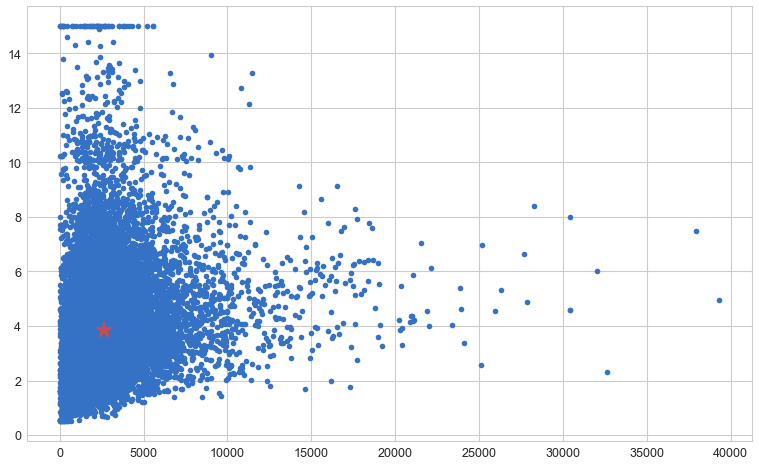

In [71]:
fig, ax = plt.subplots(figsize = (13, 8))
ax.plot(x[:, 0], x[:, 1], linestyle = '', color = 'b', marker = 'o')
ax.plot(x[:, 0].mean(), x[:, 1].mean(), linestyle = '', marker = '*', markersize = 20, color = 'r');

In [72]:
mu = x.mean(axis = 0)

$$dist(x, y) = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2 + \cdots + (x_n - y_n)^2}$$

$$|x - y|= \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2 + \cdots + (x_n - y_n)^2}$$

In [73]:
np.linalg.norm(x[0, :] - mu)

1756.5098804810514

In [74]:
dist = np.array([np.linalg.norm(v - mu) for v in x])

In [75]:
dist

array([1756.50988048, 4462.49796576, 1169.50913568, ...,  382.51039525,
        776.5068192 ,  148.50316731])

## Boxplot

In [76]:
x = data2['total_rooms'].values.copy()

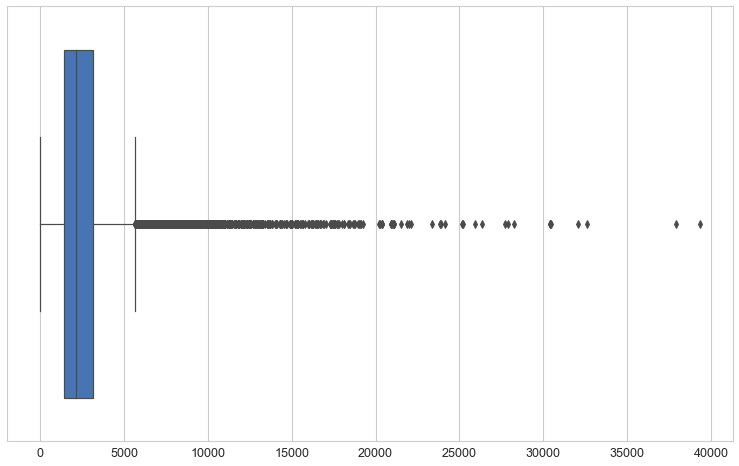

In [77]:
fig, ax = plt.subplots(figsize = (13, 8))
sns.boxplot(x = x, ax = ax);

In [78]:
q1 = np.percentile(x, 25)
q2 = np.percentile(x, 50)
q3 = np.percentile(x, 75)

In [79]:
iqr = q3 - q1

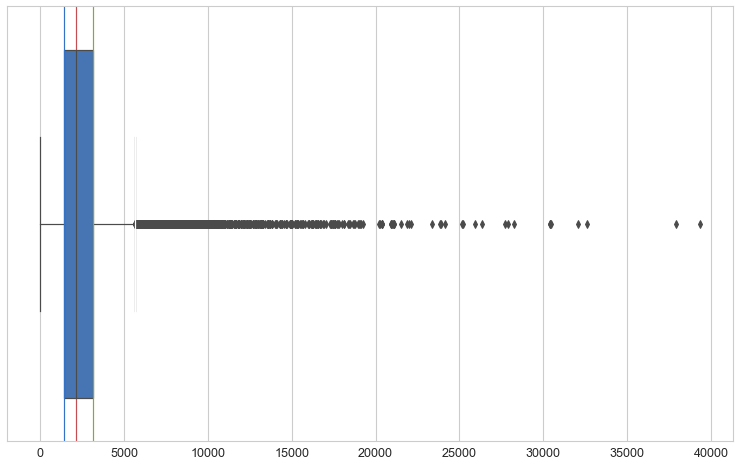

In [80]:
fig, ax = plt.subplots(figsize = (13, 8))
sns.boxplot(x = x, ax = ax)
ax.axvline(q1, color = 'b')
ax.axvline(q2, color = 'r')
ax.axvline(q3, color = 'g')
ax.axvline(q3 + iqr * 1.5, color = 'w')
ax.axvline(q1 - iqr * 1.5, color = 'w');
#ax.axvline(x.min(), color = 'w');

In [81]:
mask = x < (q1 - 1.5 * iqr)
x[mask]

array([], dtype=float64)

In [82]:
mask = x > (q3 + 1.5 * iqr)
x[mask] = q3 + 1.5 * iqr

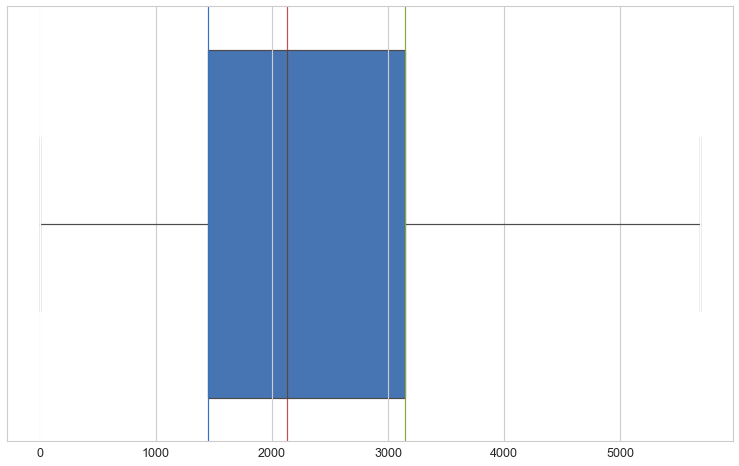

In [83]:
fig, ax = plt.subplots(figsize = (13, 8))
sns.boxplot(x = x, ax = ax)
ax.axvline(q1, color = 'b')
ax.axvline(q2, color = 'r')
ax.axvline(q3, color = 'g')
ax.axvline(q3 + iqr * 1.5, color = 'w')
ax.axvline(x.min(), color = 'w');

## Implementation

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

def ourliers(datos, metodo='boxplot', umbral=1.96):
    """
    Identifica valores atípicos en una serie de datos.

    Parámetros:
    - datos: La serie de datos.
    - metodo: El método a utilizar ('boxplot' o 'zscore').
    - umbral: El umbral para identificar valores atípicos con Z-Score.

    Retorna:
    - Lista de índices de valores atípicos.
    """
    if metodo == 'boxplot':
        # Identificar atípicos usando boxplot
        q1 = np.percentile(datos, 25)
        q3 = np.percentile(datos, 75)
        iqr = q3 - q1
        umbral_boxplot = 1.5 * iqr
        atipicos = np.where((datos < q1 - umbral_boxplot) | (datos > q3 + umbral_boxplot))[0]
    elif metodo == 'zscore':
        # Identificar atípicos usando Z-Score
        z_scores = zscore(datos)
        atipicos = np.where(np.abs(z_scores) > umbral)[0]
    else:
        raise ValueError("Método no válido. Use 'boxplot' o 'zscore'.")

    return atipicos

# Ejemplo de uso
datos_ejemplo = [1, 2, 3, 4, 5, 20]

# Identificar atípicos usando boxplot
atipicos_boxplot = ourliers(datos_ejemplo, metodo='boxplot')
print("Atípicos (boxplot):", atipicos_boxplot)

# Identificar atípicos usando Z-Score
atipicos_zscore = ourliers(datos_ejemplo, metodo='zscore')
print("Atípicos (zscore):", atipicos_zscore)

Atípicos (boxplot): [5]
Atípicos (zscore): [5]
